# 9370번 미확인 도착지 - Gold 2

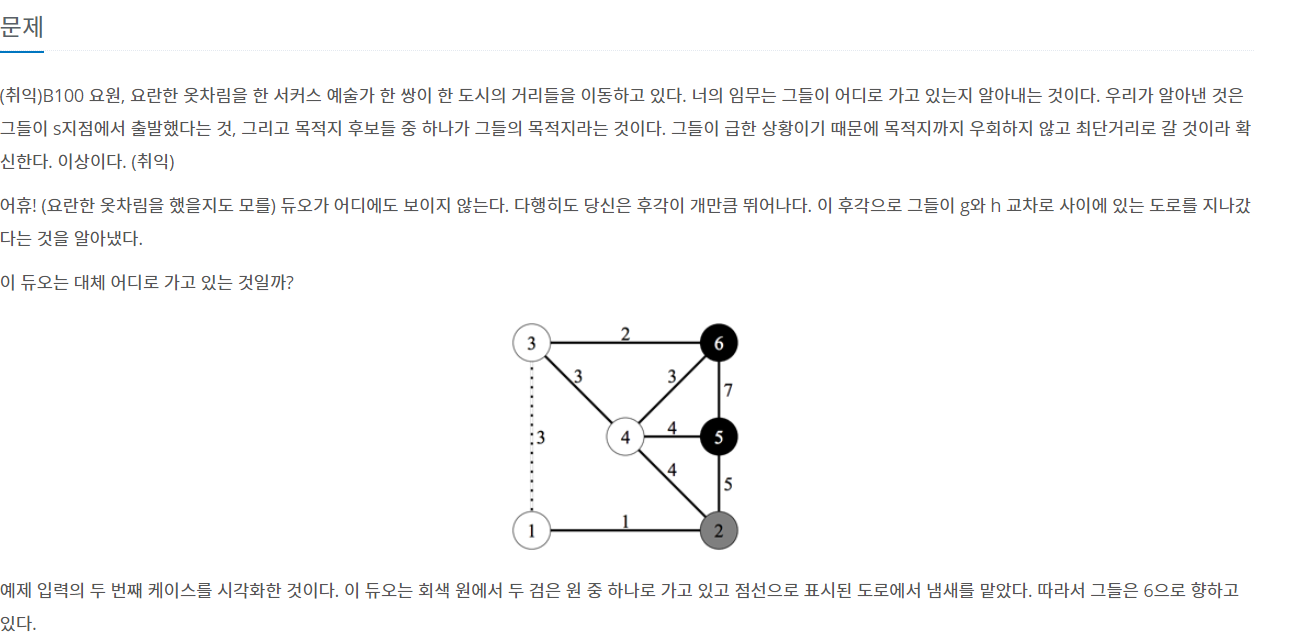


In [ ]:
T = int(input())

import sys
import heapq

input = sys.stdin.readline

from collections import defaultdict


def dijkstra(start):  # 출발점 노드개수
    q = []
    heapq.heappush(q, [0, start])
    INF = sys.maxsize
    result = [INF for _ in range(n + 1)]
    result[start] = 0
    while q:
        dis, start = heapq.heappop(q)
        if dis > result[start]:
            continue
        for d, x in graph[start]:
            d += dis
            if d < result[x]:
                result[x] = d
                heapq.heappush(q, [d, x])

    return result

for _ in range(T):
    n, m, t = map(int, input().split())
    s, g, h = map(int, input().split())
    graph = [[] for _ in range(n+1)]


    for i in range(m):
        a, b, c = map(int, input().split())

        graph[a].append([c,b])
        graph[b].append([c,a])
    answer=  []
    test = [int(input()) for _ in range(t)]

    dist_s = dijkstra(s)
    dist_h = dijkstra(h)
    dist_g = dijkstra(g)
    for case in test:
        s_to_end = dist_s[case]
        s_to_g = dist_s[g]
        s_to_h = dist_s[h]

        h_to_g = dist_h[g]
        h_to_end = dist_h[case]
        g_to_h = dist_g[h]
        g_to_end = dist_g[case]

        if g_to_end == float('inf') or h_to_end == float('inf') or s_to_end == float('inf'):
            continue
        if s_to_end == (s_to_g + g_to_h + h_to_end) or s_to_end == (s_to_h +h_to_g+g_to_end):
            answer.append(case)
    answer.sort()
    print(*answer)

